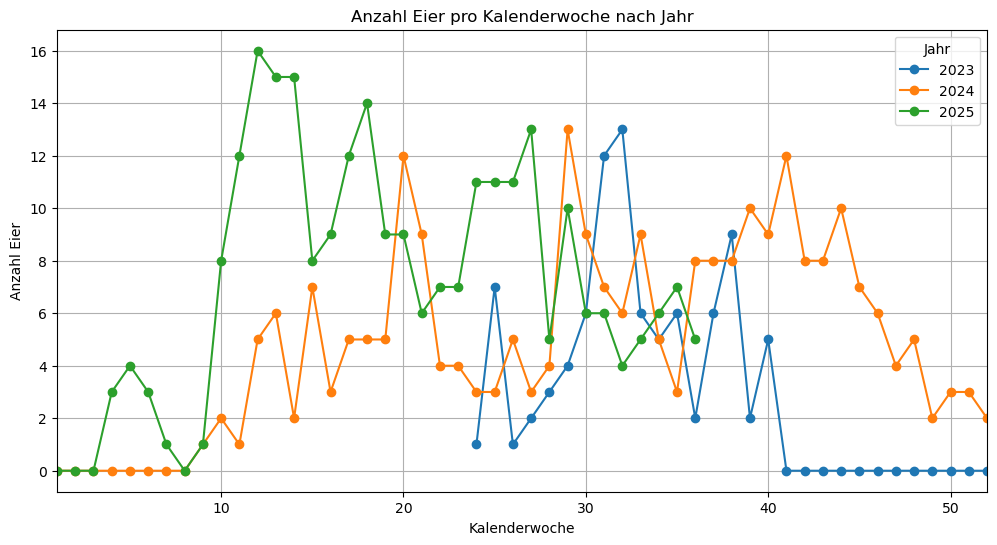

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("chat_parsed.csv")

# Convert 'Datum' to datetime
df['Datum'] = pd.to_datetime(df['Datum'])

# Extract ISO year and week
df['Jahr'] = df['Datum'].dt.isocalendar().year
df['Kalenderwoche'] = df['Datum'].dt.isocalendar().week

# Group by year and week and sum '# Eier'
weekly_eier = df.groupby(['Jahr', 'Kalenderwoche'])['# Eier'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))

# Plot each year separately
for jahr in weekly_eier['Jahr'].unique():
    data = weekly_eier[weekly_eier['Jahr'] == jahr]
    plt.plot(
        data['Kalenderwoche'],
        data['# Eier'],
        marker='o',
        label=str(jahr)
    )

plt.xlim(1, 52)  # weeks 1 to 52
plt.xlabel("Kalenderwoche")
plt.ylabel("Anzahl Eier")
plt.title("Anzahl Eier pro Kalenderwoche nach Jahr")
plt.legend(title="Jahr")
plt.grid(True)
plt.show()